In [1]:
from IPython.display import Image as IPythonImage
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw

In [2]:
def display_cover(top,bottom ):
    """This fucntoin
    """
    import requests
    
    name='album_art_raw.png'
    # Now let's make get an album cover.
    # https://picsum.photos/ is a free service that offers random images.
    # Let's get a random image:
    album_art_raw = requests.get('https://picsum.photos/500/500/?random')
    # and save it as 'album_art_raw.png'
    with open(name,'wb') as album_art_raw_file:
       album_art_raw_file.write(album_art_raw.content)
    # Now that we have our raw image, let's open it 
    # and write our band and album name on it
    img = Image.open("album_art_raw.png")
    draw = ImageDraw.Draw(img)

    # We'll choose a font for our band and album title, 
    # run "% ls /usr/share/fonts/truetype/dejavu" in a cell to see what else is available,
    # or download your own .ttf fonts!
    band_name_font = ImageFont.truetype("/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf", 25) #25pt font
    album_name_font = ImageFont.truetype("/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf", 20) # 20pt font

    # the x,y coordinates for where our album name and band name text will start
    # counted from the top left of the picture (in pixels)
    band_x, band_y = 50, 50
    album_x, album_y = 50, 400

    # Our text should be visible on any image. A good way
    # of accomplishing that is to use white text with a 
    # black border. We'll use the technique shown here to draw the border:
    # https://mail.python.org/pipermail/image-sig/2009-May/005681.html
    outline_color ="black"

    draw.text((band_x-1, band_y-1), top, font=band_name_font, fill=outline_color)
    draw.text((band_x+1, band_y-1), top, font=band_name_font, fill=outline_color)
    draw.text((band_x-1, band_y+1), top, font=band_name_font, fill=outline_color)
    draw.text((band_x+1, band_y+1), top, font=band_name_font, fill=outline_color)

    draw.text((album_x-1, album_y-1), bottom , font=album_name_font, fill=outline_color)
    draw.text((album_x+1, album_y-1), bottom , font=album_name_font, fill=outline_color)
    draw.text((album_x-1, album_y+1), bottom , font=album_name_font, fill=outline_color)
    draw.text((album_x+1, album_y+1), bottom , font=album_name_font, fill=outline_color)

    draw.text((band_x,band_y),top,(255,255,255),font=band_name_font)
    draw.text((album_x, album_y),bottom,(255,255,255),font=album_name_font)

    return img

QUESTION 1: Use the display_cover function to display the image with the name Python on the top and 
Data Science on the bottom. Save the image as 'sample-out.png'.

In [3]:
img=display_cover(top='Python',bottom='Data Science')

In [4]:
img.save("sample_out.png")

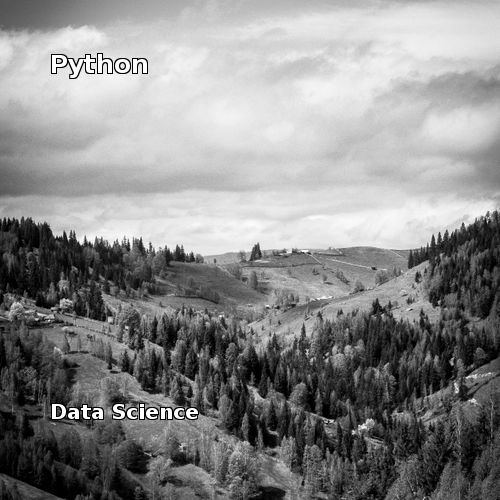

In [60]:
# To read the image

IPythonImage(filename='sample_out.png', width = 300, height = 300 )

Get Wikipedia page converted to a string

1. Extracting first title

In [6]:
import requests

In [7]:
wikipedia_link = 'https://en.wikipedia.org/wiki/Special:Random'

In [8]:
wikipedia_link

'https://en.wikipedia.org/wiki/Special:Random'

In [9]:
raw_random_wikipedia_page = requests.get('https://en.wikipedia.org/wiki/Special:Random')
raw_random_wikipedia_page

<Response [200]>

In [19]:
page = raw_random_wikipedia_page.text

In [20]:
print(page)

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Bodies and Minds - Wikipedia</title>
<script>document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );</script>
<script>(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Bodies_and_Minds","wgTitle":"Bodies and Minds","wgCurRevisionId":870065728,"wgRevisionId":870065728,"wgArticleId":8866579,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Articles with hAudio microformats","2005 albums","Great Lake Swimmers albums"],"wgBreakFrames":false,"wgPageContentLanguage":"en","wgPageContentModel":"wikitext","wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","Januar

In [38]:
from xml.etree import ElementTree as ET

band_titlestr = ET.fromstring('<title>Bodies and Minds - Wikipedia</title>')
band_titlestr
band_titlestr.text
band_title = band_titlestr.text.strip(' - Wikipedia')
band_title

'Bodies and Minds'

2. Extracting second title

In [50]:
import requests
wikipedia_link = 'https://en.wikipedia.org/wiki/Special:Random'
raw_random_wikipedia_page_title2 = requests.get('https://en.wikipedia.org/wiki/Special:Random')
raw_random_wikipedia_page_title2

<Response [200]>

In [51]:
page1 = raw_random_wikipedia_page_title2.text

In [52]:
print(page1)

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Easington (UK Parliament constituency) - Wikipedia</title>
<script>document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );</script>
<script>(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Easington_(UK_Parliament_constituency)","wgTitle":"Easington (UK Parliament constituency)","wgCurRevisionId":846409453,"wgRevisionId":846409453,"wgArticleId":1820456,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Wikipedia articles incorporating an LRPP-MP template with two unnamed parameters","Coordinates on Wikidata","Parliamentary constituencies in County Durham","United Kingdom Parliamentary constituencies established in 1950"],"wgBreakFrames":false,"wgPage

In [55]:
from xml.etree import ElementTree as ET

album_titlestr = ET.fromstring('<title>Easington (UK Parliament constituency) - Wikipedia</title>')
album_titlestr
album_titlestr.text
album_title = album_titlestr.text.strip(' - Wikipedia')
album_title

'Easington (UK Parliament constituency)'

In [56]:
print("Your band: ", band_title)
print("Your album: ", album_title)

Your band:  Bodies and Minds
Your album:  Easington (UK Parliament constituency)


In [57]:
album_cover = display_cover(top = band_title, bottom = album_title)

In [58]:
album_cover.save("randomimage.png")

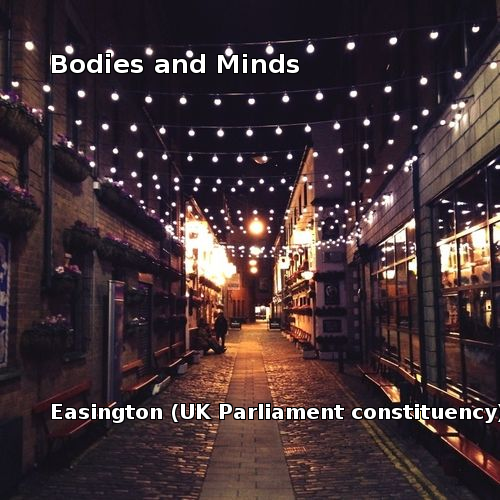

In [59]:
IPythonImage("randomimage.png")